# Getting data common for all the flights -- clutter and arena data

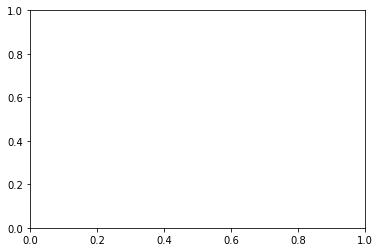

In [1]:
import glob
import os
import pandas as pd

import numpy as np
from tqdm.notebook import tqdm

# matplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.ticker as ticker


# To get some interaction
from ipywidgets import interactive, interact, widgets
# Config
import configparser
# Our tools
from tools.loading import load_conditions_table
from tools.plot_trajectory import plot_trajectory
import mcampy.core.transforms as tf
from navipy.tools.plots import get_color_dataframe
from navipy.trajectories import Trajectory
from mpl_toolkits.mplot3d.art3d import Line3DCollection


# %matplotlib notebook
import math

%load_ext autoreload
%autoreload 2
#%matplotlib qt

# Part1 - Getting required data 

In [2]:
# code from others

In [3]:
insect_id = '1R' # tag id of the insect
recording = '20210414_165225' # file name

In [4]:
# get trajectory csv file ---- traj_nv
common_path = '/path/' # common path 


In [ ]:
# recording path
recording_path = os.path.join(common_path,bee_id,recording)


In [ ]:
# Trajectory data
traj_data = pd.read_csv(os.path.join(recording_path,('traj_nv_{}.csv'.format(recording))))

In [5]:
# loading object positions of the experimental arena

# code from others

In [6]:
# getting nest location
nest_loc = object_pos.loc['nest']
nest_loc.x

0.03

In [7]:
# Function to get the distance (hypoteneous between two points)

def get_hypo(variable_loc,fixed_loc): 
    """ Function to get the hypoteneous. It will be used to get the distance between the center and bee location.""" 
    """ Otherwise to get the distance between the nest and bee location"""
    # varial_locParam - location variable in the loop
    # focal_loc - fixed location like nest or center
    x_coord = variable_loc.x
    y_coord = variable_loc.y
    distance = list ()
    
    for ii in range(len(x_coord)):
        dist = math.hypot(fixed_loc[0]-x_coord.iloc[ii],fixed_loc[1]-y_coord.iloc[ii])
        distance.append(dist)
    
    return distance


In [8]:
objects_only = object_pos.drop('nest') # Nest is not an object

In [9]:
clutter_center = [0,0] #center of the clutter
# dsitance between the object and the center of the clutter
centerObject_dist = get_hypo(objects_only,clutter_center) 

In [10]:
objects_only

,x,y,z
0,-0.224,-0.039,0.0
1,-0.044,-0.343,0.0
2,-0.158,0.057,0.0
3,0.382,-0.033,0.0
4,-0.109,-0.043,0.0
5,-0.018,-0.117,0.0
6,0.277,-0.192,0.0
7,0.125,0.141,0.0
8,0.229,-0.115,0.0
9,-0.202,-0.150,0.0


In [11]:
# slecect the largest distance 
clutter_center = [0,0] #center of the clutter
clut_radius = max(centerObject_dist)
# just to check
print(clut_radius)
clut_height = 0.282

0.3878479083352133


In [12]:
# saving clutter data (radius and height)
data = {'radius':[clut_radius], 'height':[clut_height],'nest_loc_x':[nest_loc.x],'nest_loc_y':[nest_loc.y]}
clutter_data = pd.DataFrame(data)
# df.rename(columns=df.iloc[0]).drop(df.index[0])

In [13]:
clutter_data

,radius,height,nest_loc_x,nest_loc_y
0,0.387848,0.282,0.03,0.1


In [14]:
# ----------------------------------------------------------------------------------------------------------

# getting the angle between three points - A,B and C
**A = arbitrarily defined point for reference which is (0,radius)**

**B = clutter center which is (0,0)**

**C = nest_coordinates**

In [15]:
# getting the angle between three points - A=(0,clut_radius), B=clutter_centeri.e,(0,0), C=nest_coordinates
angle_rad = np.arctan2((nest_loc.x - 0),(nest_loc.y - 0)) - np.arctan2((0-0),(clut_radius-0))
angle_deg = np.degrees(angle_rad)

# ----------------------------- alternative -------------------------------------------------
# vector1 = [0,clut_radius]
# vector2 = [(nest_loc.x),(nest_loc.y)]

# unit_vector1 = vector1 / np.linalg.norm(vector1)
# unit_vector2 = vector2 / np.linalg.norm(vector2)

# dot_product = np.dot(unit_vector1, unit_vector2)

# angle_rad = np.arccos(dot_product) #angle in radian
# angle_deg = np.rad2deg(angle_rad) 

angle_deg

16.69924423399362

# # Getting the coordinates of a new reference point
** getting the coordinates of a, which in in the direction of center-nest at the distance=radius**

** necessary to get the angle keeping nest as the NEW center**

In [16]:
# other point is the point on the clutter circuference in the direction of center and the nest  
getting the coordinates of other point whihc is at the "distance = clutter radius"
# and angle is "angle_deg" from the point (0,r)

# need to get the angles with respect to the nest
other_point_x = clut_radius*np.sin(angle_rad)
print(other_point_x)

other_point_y = clut_radius*np.cos(angle_rad)
print(other_point_y)

other_point = [other_point_x,other_point_y]
print(other_point)

0.1114472763814533
0.371490921271511
[0.1114472763814533, 0.371490921271511]


# # Get the circumference coordinates of the clutter

plotting the circumference points

In [18]:
from pygame.math import Vector2

pygame 2.1.2 (SDL 2.0.16, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [19]:
angle = 360/360
circum_coord_list = []
for ii in range(360): 
    vec = clutter_center + Vector2(clut_radius,0).rotate(ii*angle)
#     print(vec.y)
    circum_coord_list.append([(vec.x),(vec.y)]) # circumference coordinates

In [38]:
circum_coord_list

[[0.3878479083352133, 0.0],
 [0.38778883722019036, 0.006768879332116422],
 [0.3876116418687553, 0.013535696798016675],
 [0.3873163762563287, 0.020298391159549012],
 [0.3869031303236764, 0.027054902434499224],
 [0.3863720299495128, 0.03380317252408116],
 [0.38572323691215665, 0.04054114583985357],
 [0.38495694884025217, 0.04726676992987227],
 [0.38407339915256933, 0.05397799610388685],
 [0.38307285698690197, 0.060672780057391594],
 [0.3819556271180863, 0.06734908249434043],
 [0.3807220498651632, 0.0740048697483363],
 [0.3793725009877139, 0.08063811440210553],
 [0.3779073915713998, 0.08724679590506894],
 [0.3763271679027419, 0.09382890118882098],
 [0.37463231133317776, 0.10038242528032991],
 [0.3728233381324368, 0.10690537191267208],
 [0.3709007993312799, 0.11339575413311406],
 [0.36886528055365003, 0.11985159490835773],
 [0.36671740183828533, 0.12627092772676385],
 [0.3644578174498494, 0.13265179719737047],
 [0.36208721567963603, 0.13899225964552397],
 [0.35960631863590914, 0.1452903837

In [21]:
# code to get the experimental arena circumpherance
# code from others

In [22]:
clutter_data

,radius,height,nest_loc_x,nest_loc_y
0,0.387848,0.282,0.03,0.1


In [23]:

nest_x = clutter_data.nest_loc_x
nest_y = clutter_data.nest_loc_y


In [24]:
# get the circumference of the 
Nest_arenaCircum_dist = []
for ii in range(len(Xc_2d)):
        dist = math.hypot(nest_x- Xc_2d[ii], nest_y-Yc_2d[ii])
        Nest_arenaCircum_dist.append(dist)
min_dist = min(Nest_arenaCircum_dist)
max_dist = max(Nest_arenaCircum_dist)
print(min_dist)
min_dist_indexPos = Nest_arenaCircum_dist.index(min_dist)
max_dist_indexPos = Nest_arenaCircum_dist.index(max_dist)
print(max_dist_indexPos)
Xc_2D_min = Xc_2d[min_dist_indexPos]
Yc_2D_min = Yc_2d[min_dist_indexPos]

Xc_2D_max = Xc_2d[max_dist_indexPos]
Yc_2D_max = Yc_2d[max_dist_indexPos]

0.31139301595887015
245


In [25]:

min_dist

0.31139301595887015

In [29]:
nest_circum_dist

,nest_circum_dist
0,0.696348
1,0.688797
2,0.681225
3,0.673634
4,0.666026
...,...
355,0.726314
356,0.718861
357,0.711381
358,0.703876


In [28]:
nest_circum_dist = pd.DataFrame({'nest_circum_dist':Nest_arenaCircum_dist})
# nest_circum_dist.to_csv(os.path.join(common_path,'areana_circum_dist.csv'))

In [37]:
# nest_circum_dist['angle_deg','angle_rad'] = ''

In [30]:
for ii in range(len(Nest_arenaCircum_dist)):
        
    x_coord = Xc_2d[ii]
    y_coord = Yc_2d[ii]
    angle_Rad = np.arctan2((x_coord- nest_x),(y_coord - nest_y)) - np.arctan2((other_point[0]-nest_x),(other_point[1]-nest_y))
    angle_Deg = np.degrees(angle_Rad)
    
    nest_circum_dist.at[ii,'angle'] = angle_Deg[0]


# nest_circum_dist
    

In [39]:
# convert all the angle to 0-360
nest_circum_dist["angle"] %= 360

In [43]:
# check if there is any negative value
(nest_circum_dist.angle<0).any().any()

False

In [44]:
nest_circum_dist.to_csv(os.path.join(common_path,'areana_circum_dist.csv'))

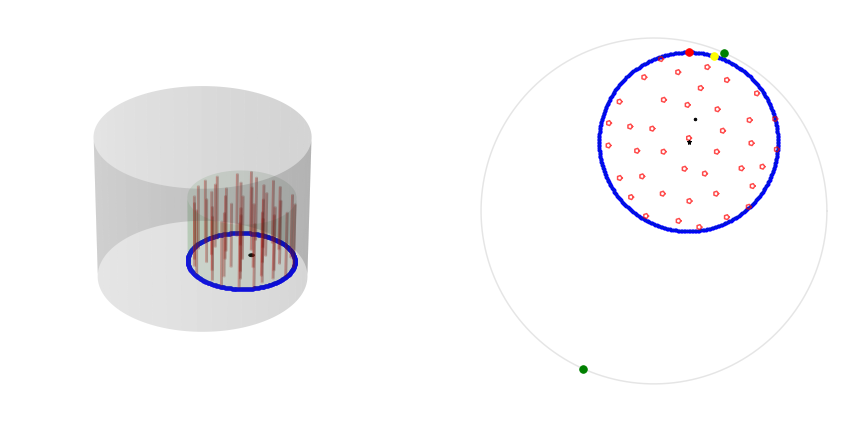

In [38]:
# NO NEED TO PLOT THE TRAJECTORY

# code from others - not privided

#_________Plot nest____________________________________________________________________________________________
   
nest_x = nest_loc['x']
nest_y = nest_loc['y']
nest_z = nest_loc['z']
nest_radius = 0.02
alph = 1

#______________________________________________________________________________________________________________

# plot the nest in 3D
circle = Circle((nest_x,nest_y), nest_radius, alpha = alph, color = 'black')
ax_xyz.add_patch(circle)
art3d.pathpatch_2d_to_3d(circle, z=nest_z, zdir='z')

# plot the nest in 2D
ax_xy.plot(nest_loc['x'],nest_loc['y'], color='black',marker='.',markersize=5,label='nest')
ax_xy.plot(0,0, color='black',marker='*',markersize=5,label='nest')


# _______________plot the clutter circle and cylinder______________________________________________________


ax_xyz.plot_surface(clutX_3d,clutY_3d,clutZ_3d, alpha=0.1, color='green')
ax_xy.plot(clutX_2d,clutY_2d, alpha=0.2, color='green')

#----------------------------------------plot the circumpherence -------------------------------------------
for ii in range(len(circum_coord_list)):
    ax_xyz.scatter(circum_coord_list[ii][0],circum_coord_list[ii][1],0, marker = '.',alpha=1 , color='blue',
                   linewidth=2)
    ax_xy.scatter(circum_coord_list[ii][0],circum_coord_list[ii][1],marker = '.' ,alpha=1, color='blue',
                  linewidth=1)

#--------------------------------- plot other point (red in the direction of nest)---------------------------

ax_xy.plot(other_point[0],other_point[1],marker='.',markersize=15,color= 'yellow')
ax_xy.plot(0,clut_radius,marker='.',markersize=15,color= 'red')

#-------------------------------------------------------------------------------------------------------------

ax_xyz.axis('off')
ax_xy.axis('off')
ax_xy.axis('equal')
ax_xyz.axis('auto')

plt.show()

In [21]:
# Save the figure

fig.savefig('{}/circum_reference_point.jpg'.format(common_path))

# Saving circumference data

In [133]:
# save the circumference coordinates:
circum_x = []
circum_y = []
for ii in range(len(circum_coord_list)):
    circum_x.append(circum_coord_list[ii][0]) 
    circum_y.append(circum_coord_list[ii][1])

In [134]:
circum_x_df = pd.DataFrame(circum_x,columns=['x_coord'])
circum_y_df = pd.DataFrame(circum_y,columns=['y_coord'])
circum_data_df = pd.concat([circum_x_df,circum_y_df],axis=1)

In [135]:
circum_data_df.head()

,x_coord,y_coord
0,0.387848,0.000000
1,0.387789,0.006769
2,0.387612,0.013536
3,0.387316,0.020298
4,0.386903,0.027055


In [136]:
check_circum_data = os.path.exists('{0}/circum_data.csv'.format(common_path))
if not check_circum_data:
    circum_data_df.to_csv('{0}/circum_data.csv'.format(common_path))
    
os.path.exists('{}/exitDistAng_data.csv'.format(recording_path))

False

# # Saving clutter data

In [37]:
angleRad_NestArena = np.arctan2((Xc_2D_min- nest_x),(Yc_2D_min - nest_y)) - np.arctan2((other_point[0]-nest_x),(other_point[1]-nest_y))
angleDeg_NestArena = np.degrees(angleRad_NestArena)


In [38]:
angleDeg_NestArena

0    6.537134
dtype: float64

In [139]:
# adding other point to the clutter data
other_pt_data = {'other_pt_x':[other_point[0]],'other_pt_y':[other_point[1]],
                'arena_minDist_X':[Xc_2D_min],'arena_minDist_Y':[Yc_2D_min],'arena_minDistAng':[angleDeg_NestArena]}
other_point_df = pd.DataFrame(other_pt_data)
# clutter_data = pd.concat(clutter_data,)
other_point_df

,other_pt_x,other_pt_y,arena_minDist_X,arena_minDist_Y,arena_minDistAng
0,0.111447,0.371491,0.152852,0.386134,6.537134


In [140]:
clutter_arena_data = pd.concat([clutter_data,other_point_df],axis=1)
clutter_arena_data

,radius,height,nest_loc_x,nest_loc_y,other_pt_x,other_pt_y,arena_minDist_X,arena_minDist_Y,arena_minDistAng
0,0.387848,0.282,0.03,0.1,0.111447,0.371491,0.152852,0.386134,6.537134


In [142]:
check_clutter_arena_data = os.path.exists('{}/clutter_arena_data.csv'.format(common_path))
if not check_clutter_arena_data:
    clutter_arena_data.to_csv('{}/clutter_arena_data.csv'.format(common_path))

### clutter circumference and corner distance and angle data

In [43]:
cylinder_cor_dist = list() 
cylinder_horzAng = list() 
cylinder_vertAng = list() 
circum_x_coord = list(circum_data_df.x_coord)
circum_y_coord = list(circum_data_df.y_coord)
height = float(clutter_data.height)

for ii in range(len(circum_x_coord)):
    dist = np.sqrt((nest_loc[0]-circum_x_coord[ii])**2 + 
                        (nest_loc[1]-circum_y_coord[ii])**2 + 
                        height**2)
# Horizontal angle
    
    horz_angle_rad = (np.arctan2((circum_x_coord[ii]-nest_loc[0]),
                                 (circum_y_coord[ii]-nest_loc[1])) - 
                            np.arctan2((other_point[0]-nest_loc[0]),
                                       (other_point[1]-nest_loc[1])))

    horz_angle_deg = np.rad2deg(horz_angle_rad % (2 * np.pi))

    
    # vertical angle
    vert_angle_deg = np.degrees(np.arcsin(height/exit_dist))

    cylinder_cor_dist.append(dist)
    cylinder_horzAng.append(horz_angle_deg)
    cylinder_vertAng.append(vert_angle_deg)

In [45]:
cylinder_cor_dist_df = pd.DataFrame(cylinder_cor_dist,columns=['cluter_corner_dist'])
cylinder_horzAng_df = pd.DataFrame(cylinder_horzAng,columns=['horz_angle'])
cylinder_vertAng_df = pd.DataFrame(cylinder_vertAng,columns=['vert_angle'])

clutterDsitAng_data = pd.concat([cylinder_cor_dist_df,cylinder_horzAng_df,cylinder_vertAng_df],axis=1)
clutterDsitAng_data.head()

,cluter_corner_dist,horz_angle,vert_angle
0,0.466454,88.913688,37.197295
1,0.465004,87.905871,37.332978
2,0.463558,86.893027,37.469420
3,0.462116,85.875086,37.606583
4,0.460679,84.851978,37.744426


In [46]:
check_clutter_DsitAng = os.path.exists('{}/clutterDsitAng_data.csv'.format(common_path))
if not check_clutter_DsitAng:
    clutterDsitAng_data.to_csv('{}/clutterDsitAng_data.csv'.format(common_path))
    